### SESSION 24.2 - PLOTLY GRAPH OBJECT

**Installing the plotly:**
- pip install plotly

**Importing the plotly graph object:**
- import plotly.graph_objects as go

**Introduction to Plotly**
- Matplotlib, pandas all are produce static image files.
- Plotly is company based out in canada and it is famous for it's products like Plotly and Dash
- Plotly creates interactive visulisations in the form of HTML files
- Drawback : can't work with live data source
- Dash is used to create live data based dashboards.

**What is Graph objects ?**
- Graph Objects in Plotly are Python class instances found in **plotly.graph_objects** module  (imported as go).
- They represent figures in Plotly, follow the Plotly.js schema, and are serialized to JSON for rendering by Plotly.js.

**When to use Graph Objects vs Plotly Express**
- Plotly Express is quick and intuitive for simple visualizations, while Graph Objects offer fine-grained control for advanced features.
- Choose based on your preference, and consider using both in a project depending on the complexity of your visualizations.
  
**Comparing Graph Objects and Plotly Express:**
- While figures from Plotly Express can be constructed using graph objects, the latter typically requires 5-100 lines of code compared to the more concise 1 line in Plotly Express.

**Note:**
- Plotly Express functions, recommended for entry into the Plotly library, are built on top of Graph Objects. All functions in Plotly Express return instances of **plotly.graph_objects.Figure**.zations.

In [7]:
import numpy as np
import pandas as pd
import plotly.offline as pyo # for offline plots without internet connection
import plotly.graph_objs as go

**go.Figure() function**- : This is the top-level object that represents the entire figure or visualization.
- **Syntax: e
fig = go.Figure(data, layo**ut)
- **data** (list): A list containing trace objects representing the data visualizations.
- **layout** (`go.Layout` or dict): An instance of `go.Layout` or a dictionary specifying layout settings for the figure.


**go.Scatter() function**
 - This is a trace object representing a scatter plot, which is a set of data points displayed as markers on a 2D plane.
- **Syntax: e
trace = go.Scatter(x, y, mode, ...additional_paramete**rs)
- **x** (list/array): X-axis data.
- **y** (list/array): Y-axis data.
- **mode** (str): Specifies the mode of the scatter plot (e.g., 'markers', 'lines', 'lines+markers').
- **marker** (dict): Customize marker properties.
  - **color** (str): Marker color.
  - **size** (int): Marker size.
  - ... (other marker properties).
- **line** (dict): Customize line properties.
  - **color** (str): Line color.
  - **width** (int): Line width.
  - ... (other line properties).
- ... (other optional parameters).


**go.Layout() function:**: This is used to customize the layout or appearance of the entire figure.
- Syntax: **layout = go.Layout(title, xaxis, yaxis, ...additional_parameters)**
- **title** (str): Title of the figure.
- **xaxis** (dict): Dictionary specifying settings for the x-axis.
  - **title** (str): X-axis title.
  - **range** (list/tuple): X-axis range.
  - ... (other x-axis properties).
- **yaxis** (dict): Dictionary specifying settings for the y-axis.
  - **title** (str): Y-axis title.
  - **range** (list/tuple): Y-axis range.
  - ... (other y-axis properties).
- **width** (int): Width of the figure.
- **height** (int): Height of the figure.
- **margin** (dict): Margin settings.
  - **l** (int): Left margin.
  - **r** (int): Right margin.
  - ... (other margin properties).
- **annotations** (list): List of annotations to be added to the figure.
  - **text** (str): Annotation text.
  - **x** (float): X-coordinate of the annotation.
  - **y** (float): Y-coordinate of the annotation.
  - ... (other annotation properties).


In [8]:
matches = pd.read_csv('DATASETS/S24.2/matches.csv')
deliveries = pd.read_csv('DATASETS/S24.2/deliveries.csv')
ipl = deliveries.merge(matches, left_on='match_id', right_on='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


#### Scatter plot:
- Scatter plots are drawn between to continous variables

In [34]:
# Problem : We are going to draw a scatter plot between Avg(X axis) and Batsman strike rate(Y axis) of the top 50 batsman in ipl
temp_df = ipl.groupby('batsman')['batsman_runs']
top50 = temp_df.sum().sort_values(ascending=False).head(50).index.tolist()
new_ipl = ipl[ipl['batsman'].isin(top50)]

In [33]:
# Calculating strike rate
# formula : sr = [(no. of runs scored)/(no of balls played)]**100
runs = new_ipl.groupby('batsman')['batsman_runs'].sum()
balls = new_ipl.groupby('batsman')['batsman_runs'].count()
sr = (runs/balls)*100
sr = sr.reset_index()
sr

,batsman,batsman_runs
0,AB de Villiers,145.129059
1,AC Gilchrist,133.054662
2,AJ Finch,126.299213
3,AM Rahane,117.486549
4,AT Rayudu,123.014257
5,BB McCullum,126.318203
6,BJ Hodge,121.422376
7,CH Gayle,144.194313
8,DA Miller,137.709251
9,DA Warner,138.318401


In [11]:
# Calculation of Avg
# Formula : Avg = (total no. of runs) / (no. of outs)

outs = ipl[ipl['player_dismissed'].isin(top50)]
no_of_outs = outs['player_dismissed'].value_counts()
avg = runs/no_of_outs
# applying the formula
avg = avg.reset_index()
# Rename the columns after the reset index
avg.rename(columns={'index':'batsman',0:'avg'}, inplace=True)
avg = avg.merge(sr, on='batsman')
avg

,batsman,avg,batsman_runs
0,AB de Villiers,38.307692,145.129059
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,27.186441,126.299213
3,AM Rahane,33.593407,117.486549
4,AT Rayudu,27.146067,123.014257
5,BB McCullum,28.112245,126.318203
6,BJ Hodge,33.333333,121.422376
7,CH Gayle,41.022472,144.194313
8,DA Miller,34.733333,137.709251
9,DA Warner,40.140000,138.318401


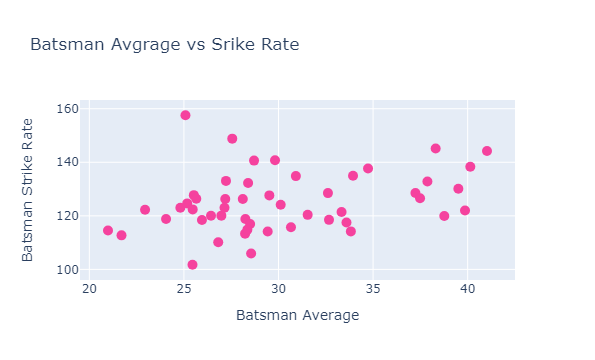

In [31]:
# Plotting scatter plot
#import plotly.offline as pyo
trace = go.Scatter(x=avg['avg'], y=avg['batsman_runs'], 
                   mode='markers', text=avg['batsman'],
                   marker={'color':'#f5429e', 'size':10})
data = [trace]
layout = go.Layout(title='Batsman Avgrage vs Srike Rate',
                  xaxis={'title':'Batsman Average'},
                  yaxis={'title':'Batsman Strike Rate'},)
fig = go.Figure(data=data, layout=layout)
# save the plot in  html format
#pyo.plot(fig, filename='scatter_plot.html') 
# fig.show() is shown plots on jupyter notebook
fig.show()